In [1]:
import pandas as pd

In [3]:
df=pd.read_csv(r"E:\Courses\Data science(ETLHive)\Deep learning\notes\diamond.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [34]:
df.shape

(193573, 10)

In [4]:
df = df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


## Seperating Categorical columns for encoding

In [9]:
cat=list(df.columns[df.dtypes=="object"])
cat

['cut', 'color', 'clarity']

In [10]:
num=list(df.columns[df.dtypes!="object"])
num

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

In [11]:
scale_mapper_cut = {"Fair":1, "Good":2, "Very Good":3 , "Premium":4 ,"Ideal":5}
scale_mapper_clarity = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
scale_mapper_color = {"D":7 ,"E":6 ,"F":5 , "G":4 ,"H":3 , "I":2, "J":1}

In [12]:
df['cut'] = df['cut'].replace(scale_mapper_cut)
df['color'] = df['color'].replace(scale_mapper_color)
df['clarity'] = df['clarity'].replace(scale_mapper_clarity)

In [13]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,5,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,1,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [14]:
x=df.drop('price',axis=1)
y=df.price

In [16]:
x.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,4,5,4,62.2,58.0,7.27,7.33,4.55
1,2.03,3,1,2,62.0,58.0,8.06,8.12,5.05
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77


In [17]:
y.head()

0    13619
1    13387
2     2772
3      666
4    14453
Name: price, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.2,random_state=42)

In [19]:
xtrain.shape

(154858, 9)

In [20]:
xtest.shape

(38715, 9)

## Standard scaling 

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

## modeling building

In [23]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping

In [24]:
nn = Sequential()
nn.add(Dense(128,input_dim=xtrain.shape[1],activation='relu'))
nn.add(BatchNormalization())
nn.add(Dropout(0.3))
nn.add(Dense(64,activation='relu'))
nn.add(BatchNormalization())
nn.add(Dropout(0.3))
nn.add(Dense(1,activation='linear'))

In [25]:
early_stop = EarlyStopping(monitor='val_loss',patience=30)

In [26]:
nn.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [27]:
hist = nn.fit(xtrain,ytrain,validation_split=0.2,batch_size=32, epochs=200, callbacks=[early_stop])

Epoch 1/200
3872/3872 [==============================] - 7s 2ms/step - loss: 23696364.0000 - mae: 3419.7739 - val_loss: 11935630.0000 - val_mae: 2505.8647
Epoch 2/200
3872/3872 [==============================] - 6s 1ms/step - loss: 5144557.0000 - mae: 1467.7104 - val_loss: 705645.6875 - val_mae: 478.9751
Epoch 3/200
3872/3872 [==============================] - 6s 1ms/step - loss: 1627217.2500 - mae: 822.9255 - val_loss: 440988.5625 - val_mae: 374.8081
Epoch 4/200
3872/3872 [==============================] - 6s 1ms/step - loss: 1405150.2500 - mae: 791.2704 - val_loss: 427918.5938 - val_mae: 354.6034
Epoch 5/200
3872/3872 [==============================] - 6s 1ms/step - loss: 1362751.3750 - mae: 791.1081 - val_loss: 428958.2812 - val_mae: 369.6703
Epoch 6/200
3872/3872 [==============================] - 6s 1ms/step - loss: 1309793.5000 - mae: 789.0151 - val_loss: 440035.8125 - val_mae: 377.2000
Epoch 7/200
3872/3872 [==============================] - 6s 1ms/step - loss: 1306603.6250 - ma

3872/3872 [==============================] - 6s 1ms/step - loss: 1236306.2500 - mae: 796.4888 - val_loss: 400712.4688 - val_mae: 342.9673
Epoch 56/200
3872/3872 [==============================] - 6s 1ms/step - loss: 1254006.0000 - mae: 805.5676 - val_loss: 399610.5312 - val_mae: 349.7121
Epoch 57/200
3872/3872 [==============================] - 6s 1ms/step - loss: 1233341.6250 - mae: 792.2233 - val_loss: 448620.3438 - val_mae: 443.5226
Epoch 58/200
3872/3872 [==============================] - 6s 1ms/step - loss: 1238327.2500 - mae: 795.6469 - val_loss: 408414.5000 - val_mae: 351.6266
Epoch 59/200
3872/3872 [==============================] - 6s 1ms/step - loss: 1232801.0000 - mae: 794.4310 - val_loss: 420877.7188 - val_mae: 404.9592
Epoch 60/200
3872/3872 [==============================] - 6s 1ms/step - loss: 1240210.6250 - mae: 797.4693 - val_loss: 460116.0312 - val_mae: 462.5026
Epoch 61/200
3872/3872 [==============================] - 6s 1ms/step - loss: 1236131.7500 - mae: 795.1128 

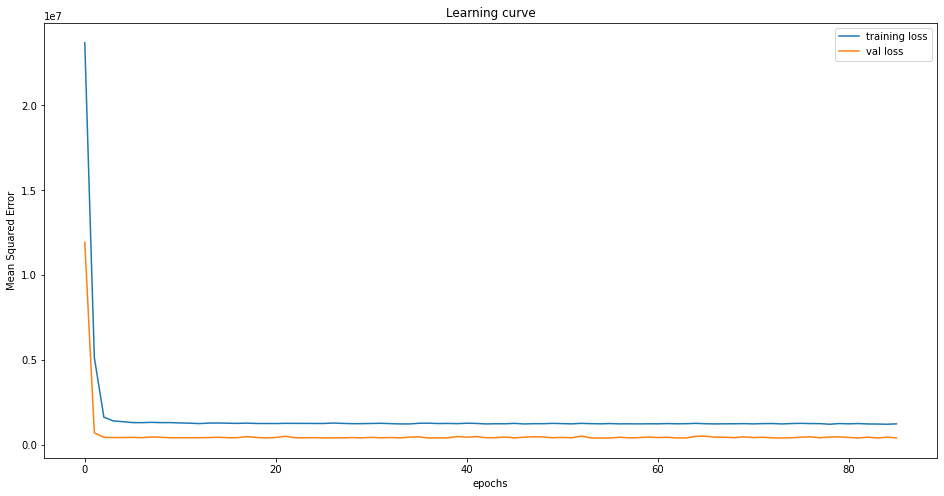

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning curve')
plt.legend()
plt.show()

## Evaluate the model

In [29]:
nn.evaluate(xtrain,ytrain)

4840/4840 [==============================] - 4s 810us/step - loss: 387704.6250 - mae: 375.7468


[387704.625, 375.7467956542969]

In [30]:
nn.evaluate(xtest,ytest)

1210/1210 [==============================] - 1s 782us/step - loss: 391769.6875 - mae: 374.5659


[391769.6875, 374.56585693359375]

In [31]:
ypred_train = nn.predict(xtrain)
ypred_test = nn.predict(xtest)

1210/1210 [==============================] - 1s 691us/step


In [32]:
# Checking for all metrics using Sklearn metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
train_mse = mean_squared_error(ytrain, ypred_train)
train_rmse = train_mse**0.5
train_mae = mean_absolute_error(ytrain,ypred_train)
train_r2 = r2_score(ytrain, ypred_train)
print('Training MSE  :',round(train_mse,2))
print('Training RMSE :',round(train_rmse,2))
print('Training MAE  :',round(train_mae,2))
print('Training R2 Score :',round(train_r2,4))

Training MSE  : 387704.63
Training RMSE : 622.66
Training MAE  : 375.75
Training R2 Score : 0.9762


In [33]:
test_mse = mean_squared_error(ytest, ypred_test)
test_rmse = test_mse**0.5
test_mae = mean_absolute_error(ytest,ypred_test)
test_r2 = r2_score(ytest, ypred_test)
print('Testing MSE  :',round(test_mse,2))
print('Testing RMSE :',round(test_rmse,2))
print('Testing MAE  :',round(test_mae,2))
print('Testing R2 Score :',round(test_r2,4))

Testing MSE  : 391769.76
Testing RMSE : 625.92
Testing MAE  : 374.57
Testing R2 Score : 0.9758
